In [7]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

In [8]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [117]:
digits.target.shape

(1797,)

In [200]:


value1 = 2
value2 = 9
value1_indices = (digits.target == value1)
print(value1_indices)
#number of digits in the array that are equal to value1
value1_indices.sum()

[False False  True ... False False False]


177

In [217]:
value2_indices = (digits.target == value2)
print(value2_indices)
#number of digits in the array that are equal to one
value2_indices.sum()

[False False False ... False  True False]


180

In [218]:
filtered_digits_indices = value1_indices | value2_indices
total = filtered_digits_indices.sum()

In [219]:
filtered_digits = digits.data[filtered_digit_indices]
filtered_digits.shape

(357, 64)

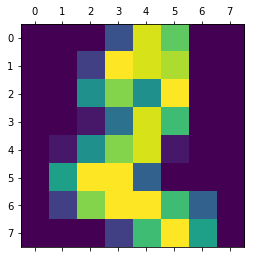

In [204]:
import matplotlib.pyplot as plt

filtered_digits_images = digits.images[bits_indices]
plt.matshow(filtered_digits_images[0])

In [205]:
n = 64
m = int(total * 80 / 100)
data_train = filtered_digits[:m,:]
data_test = filtered_digits[m:,:]
print(data_train.shape)
print(data_test.shape)

(285, 64)
(72, 64)


In [209]:
values = digits.target[filtered_digits_indices]
values[:] = (values == value1)
values_train = values[:m]
values_test = values[m:]
print(values_train.shape)
print(values_test.shape)

(285,)
(72,)


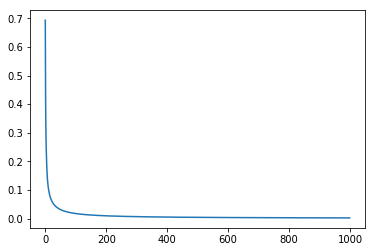

In [213]:
num_iterations = 1000
errors = []
alpha = 0.005
W = np.zeros((1, n))
b = 0
X = data_train.T
Y = values_train.reshape(1, m)

for i in range(num_iterations):
    Z = np.dot(W, X) + b
    A = 1 / (1 + np.exp(-Z))
    dZ = A - Y
    dW = np.dot(dZ, X.T) / m
    db = np.sum(dZ) / m
    W -= alpha * dW
    b -= alpha * db
    J = np.sum(- (Y * np.log(A) + (1 - Y) * np.log(1 - A))) / m
    #J = np.sum(dZ * dZ)/m
    errors.append(J)
plt.plot(errors)

In [214]:
#Accuracy on the training set
predictions_train = np.zeros((1, m))
predictions_train[:] = A > 0.5
print("accuracy on the training set: " + str(100 * np.sum(predictions_train == Y) / m) + "%")

accuracy on the training set: 100.0%


In [216]:
#Accuracy on the test set
m_test = total - m
predictions_test = np.zeros((1, m_test))
X_test = bits_test.T
Y_test = values_test.reshape(1, m_test)
Z_test = np.dot(W, X_test) + b
A_test = 1 / (1 + np.exp(-Z_test))
predictions_test[:] = A_test > 0.5
print("accuracy on the test set: " + str(100 * np.sum(predictions_test == Y_test) / m_test) + "%")

accuracy on the test set: 98.61111111111111%


In [16]:
# step1: we pick two values from 0 to 10
# step2: we filter the dataset so that it contains only those two values
# step3: we split the data to train and test sets
# step4: we run the logistic regression algorithm
def lr_binary(value1, value2, alpha = 0.005, num_iterations = 1000):
    value1_indices = (digits.target == value1)
    value2_indices = (digits.target == value2)
    filtered_digits_indices = value1_indices | value2_indices
    total = filtered_digits_indices.sum()
    filtered_digits = digits.data[filtered_digits_indices]
    n = 64
    m = int(total * 80 / 100)
    data_train = filtered_digits[:m,:]
    data_test = filtered_digits[m:,:]
    values = digits.target[filtered_digits_indices]
    values[:] = (values == value1)
    values_train = values[:m]
    values_test = values[m:]
    errors = []
    W = np.zeros((1, n))
    b = 0
    X = data_train.T
    Y = values_train.reshape(1, m)

    for i in range(num_iterations):
        Z = np.dot(W, X) + b
        A = 1 / (1 + np.exp(-Z))
        dZ = A - Y
        dW = np.dot(dZ, X.T) / m
        db = np.sum(dZ) / m
        W -= alpha * dW
        b -= alpha * db
        J = np.sum(- (Y * np.log(A) + (1 - Y) * np.log(1 - A))) / m
        errors.append(J)
    plt.plot(errors)
    
    #Accuracy on the training set
    predictions_train = np.zeros((1, m))
    predictions_train[:] = A > 0.5
    print("accuracy on the training set: " + str(100 * np.sum(predictions_train == Y) / m) + "%")
    
    #Accuracy on the test set
    m_test = total - m
    predictions_test = np.zeros((1, m_test))
    X_test = data_test.T
    Y_test = values_test.reshape(1, m_test)
    Z_test = np.dot(W, X_test) + b
    A_test = 1 / (1 + np.exp(-Z_test))
    predictions_test[:] = A_test > 0.5
    print("accuracy on the test set: " + str(100 * np.sum(predictions_test == Y_test) / m_test) + "%")
    

accuracy on the training set: 100.0%
accuracy on the test set: 100.0%


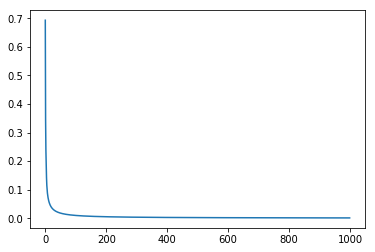

In [26]:
lr_binary(9, 6, num_iterations=1000)